In [1]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['Automobile price data (Raw)']
auto_price = ds.to_dataframe()

## Convert some columns to numeric values
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args=('coerce',))

## Remove rows with missing values
auto_price.dropna(axis = 0, inplace = True)

## Compute the log of the auto price
auto_price['lnprice'] = np.log(auto_price.price)

## Create a column with new levels for the number of cylinders
auto_price['num-cylinders'] = ['four-or-less' if x in ['two', 'three', 'four'] else 
    ('five-six' if x in ['five', 'six'] else 
    'eight-twelve') for x in auto_price['num-of-cylinders']]


auto_price.dtypes

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
lnprice              float64
num-cylinders         object
dtype: object

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


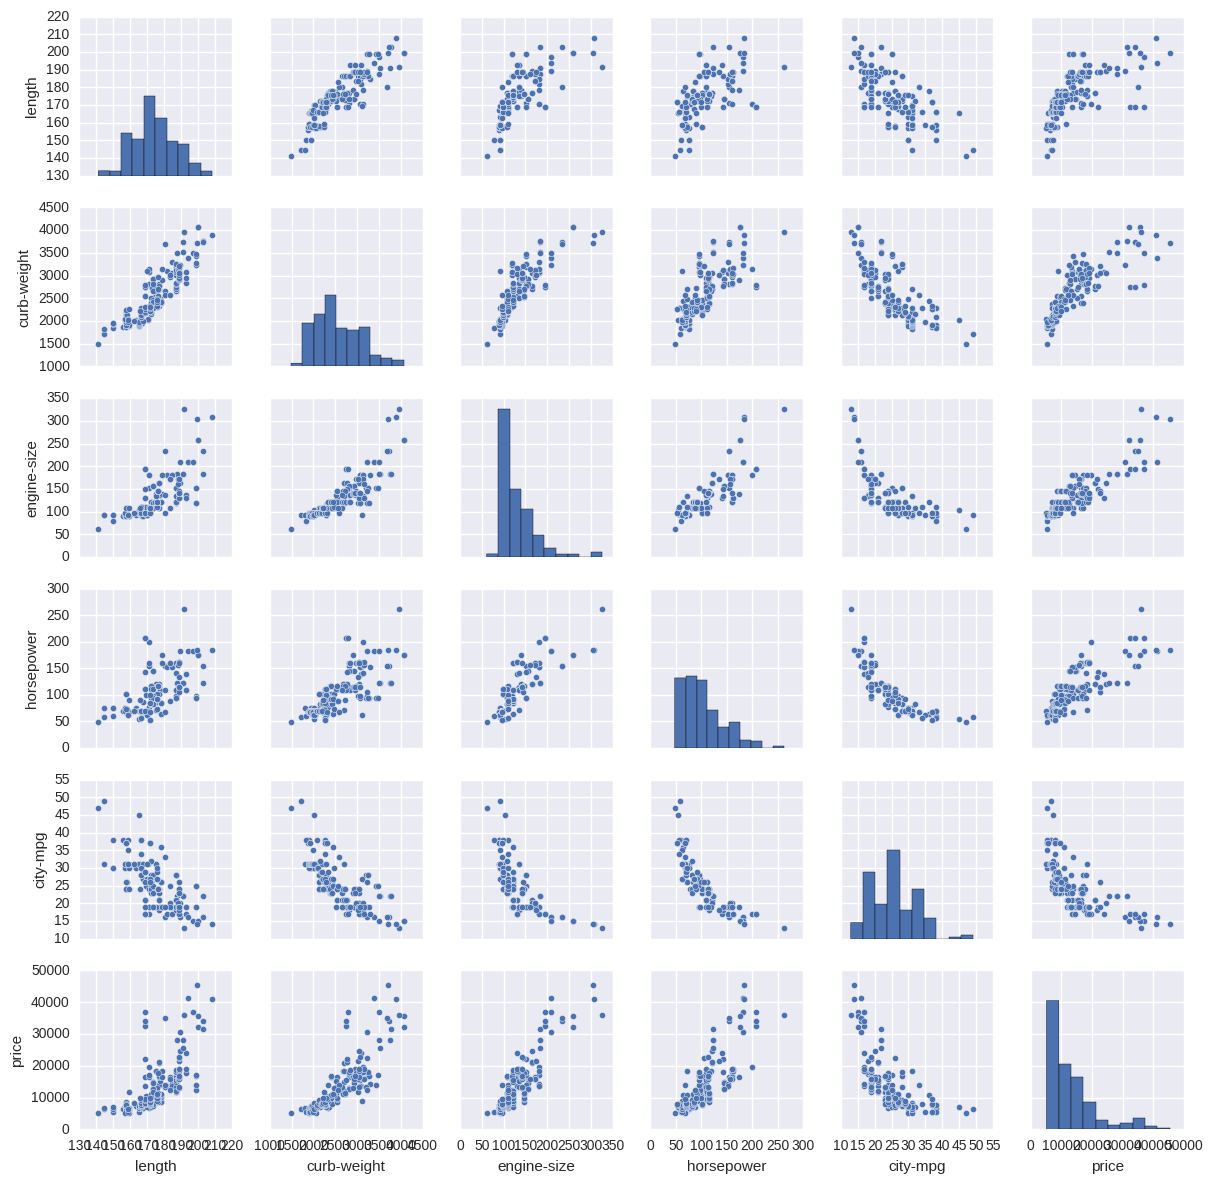

In [2]:
import seaborn as sns
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_price[num_cols], size=2)

'drive-wheels'

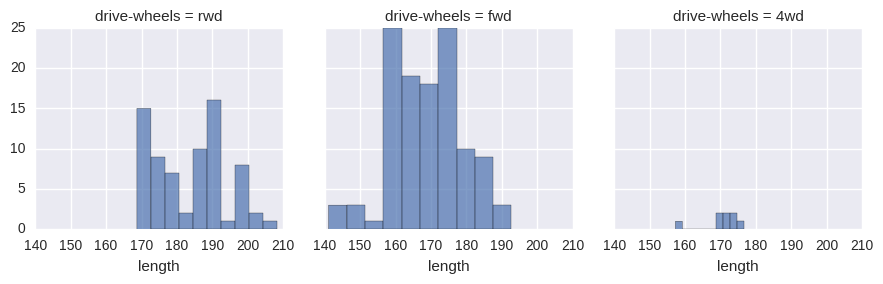

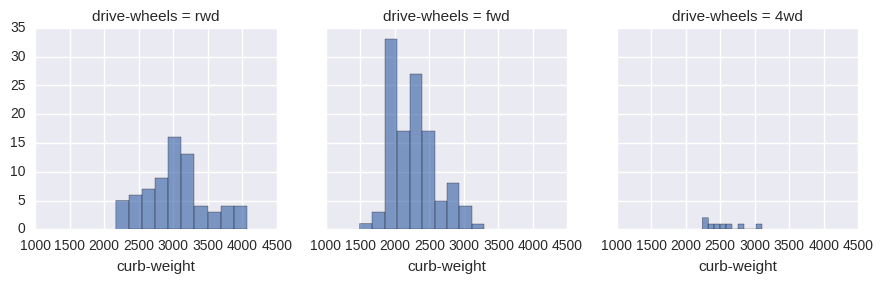

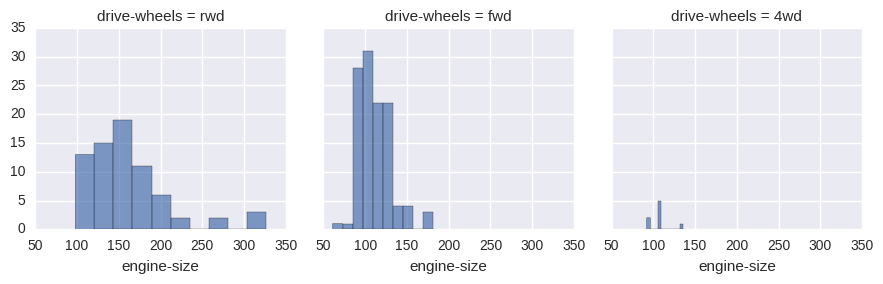

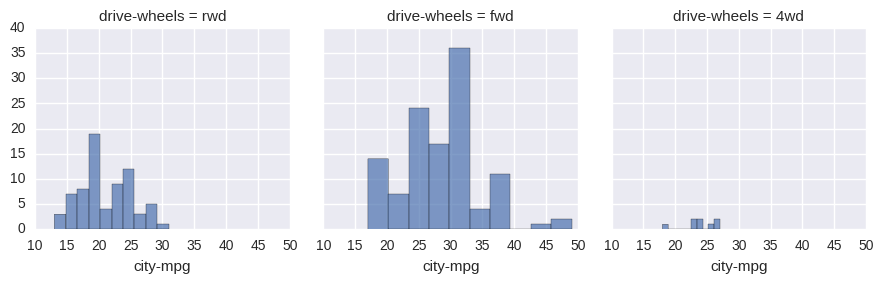

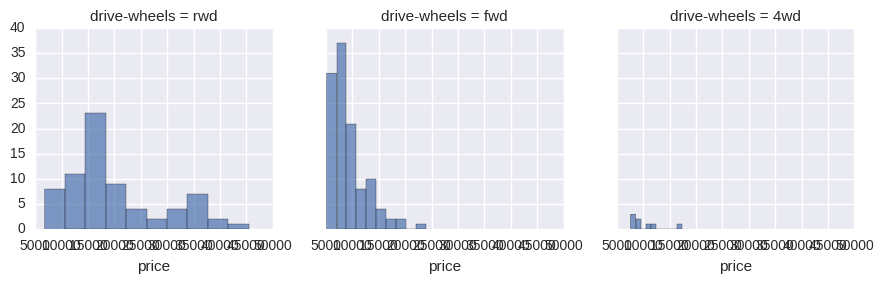

In [3]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg",
               "price"]

cond_hists(auto_price, plot_cols2, 'drive-wheels')

'drive-wheels'

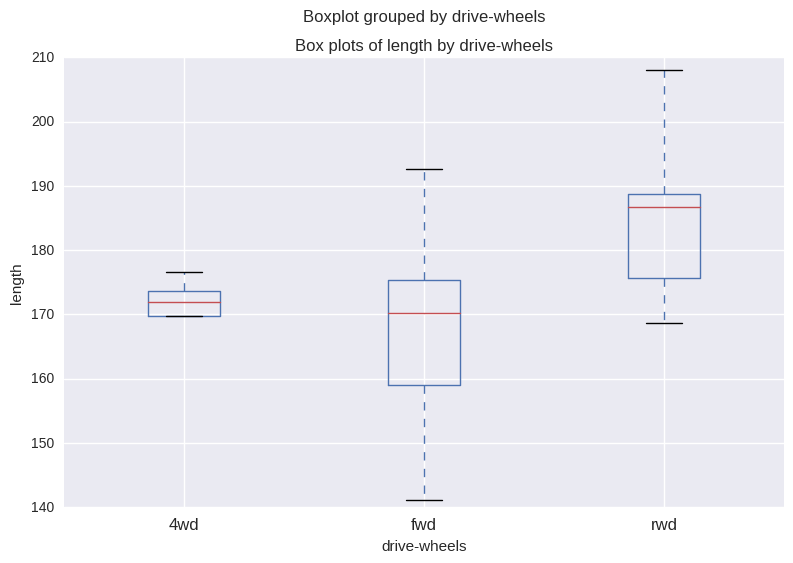

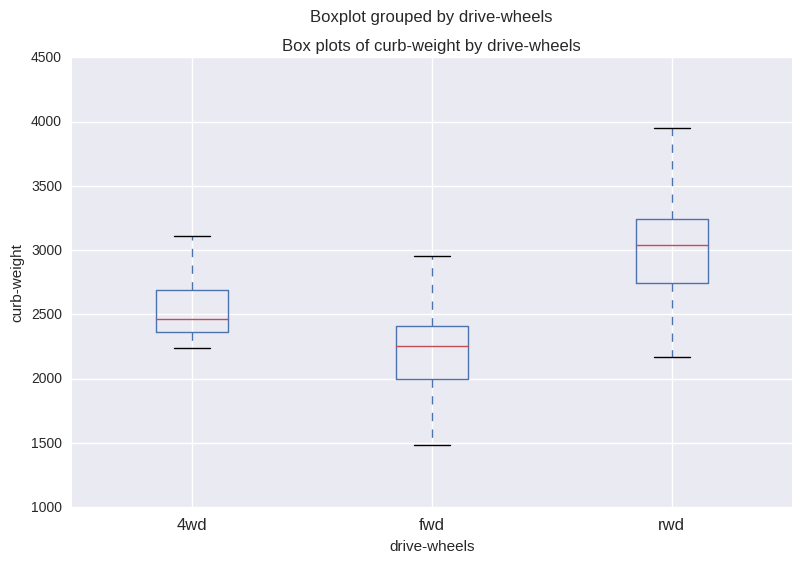

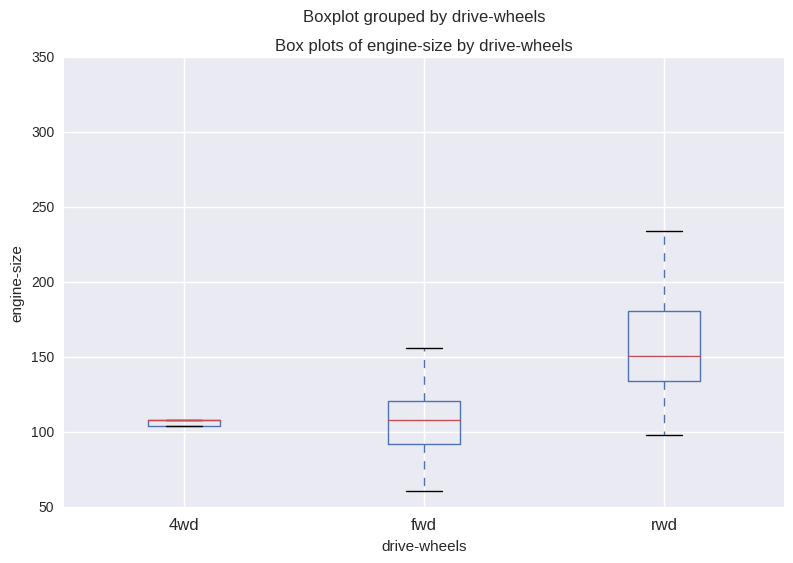

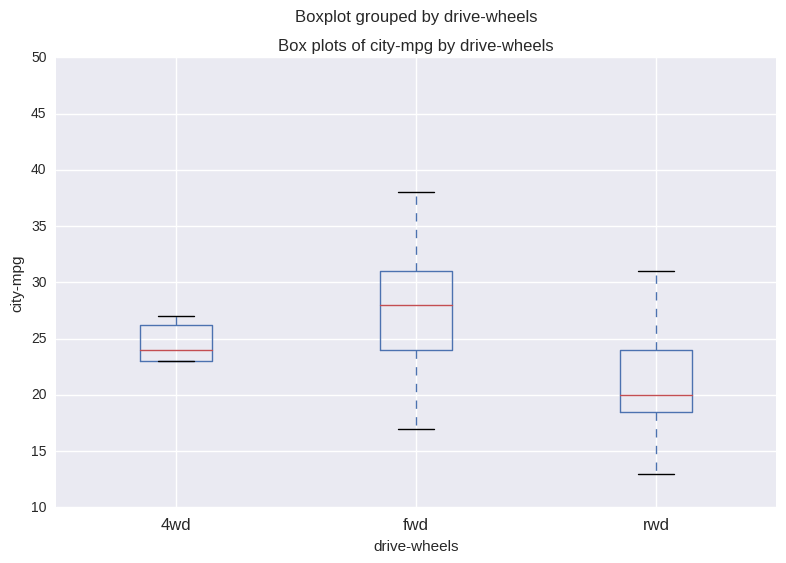

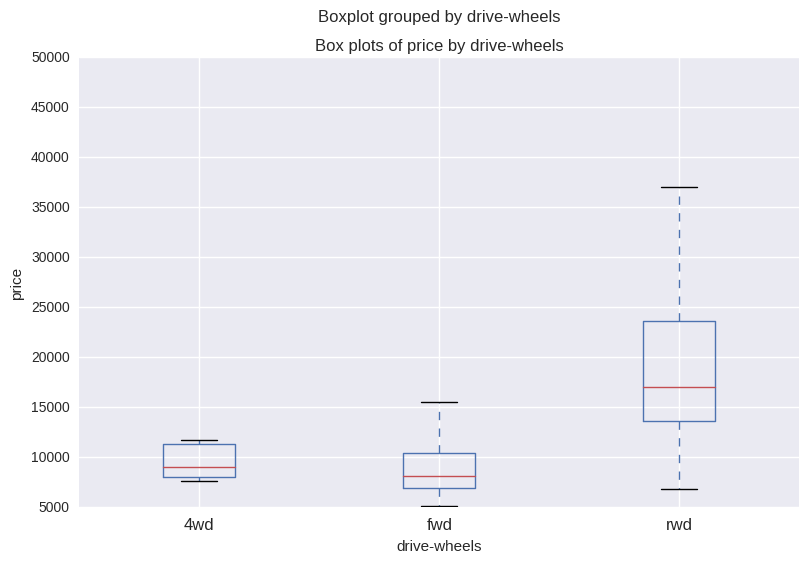

In [4]:
## Create boxplots of data
def auto_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by 

auto_boxplot(auto_price, plot_cols2, "drive-wheels")

['length', 'curb-weight', 'engine-size', 'city-mpg']

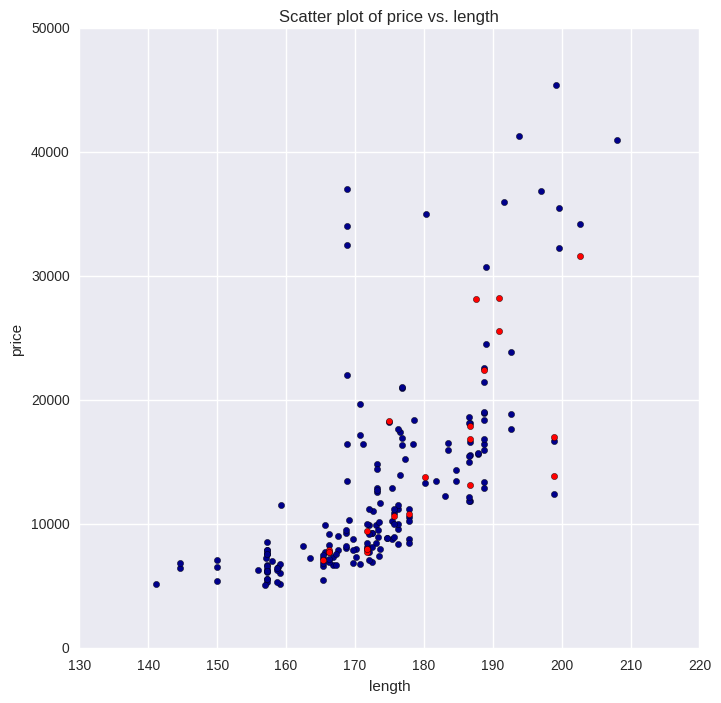

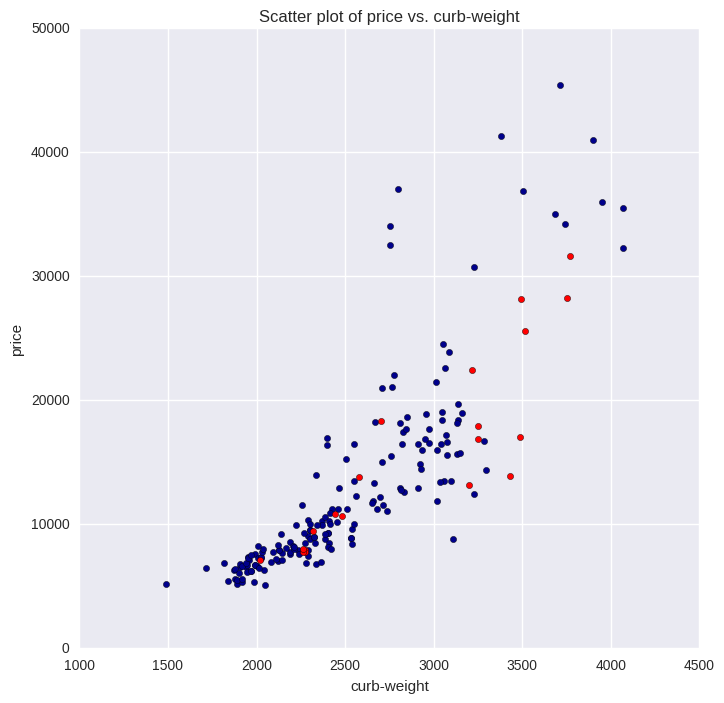

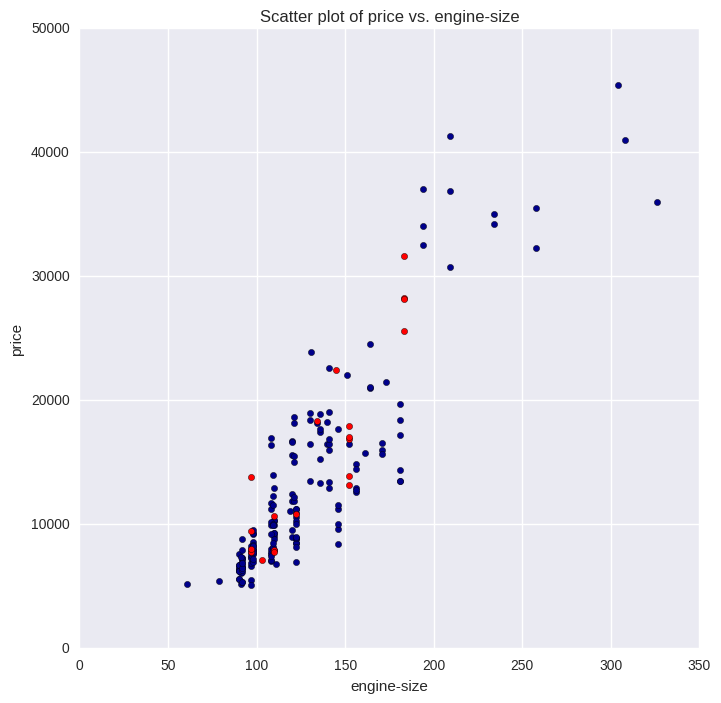

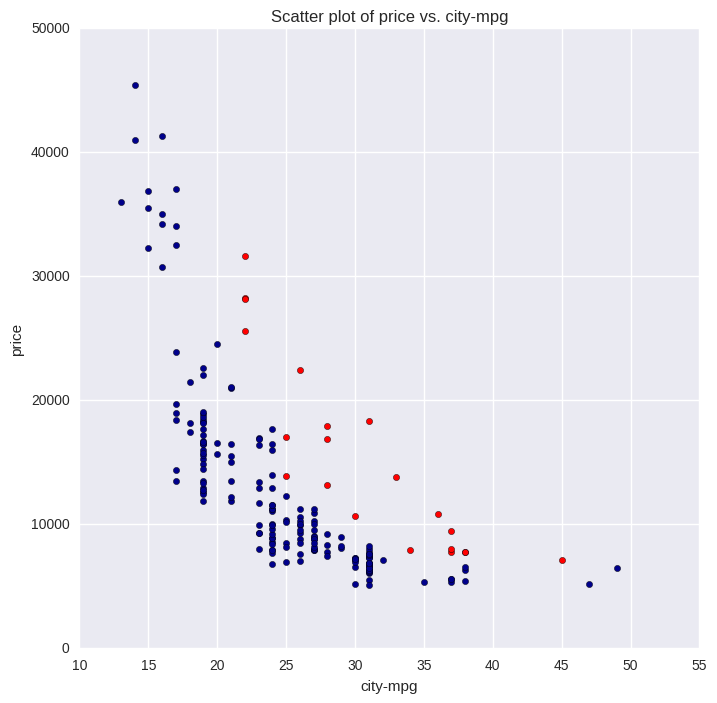

In [5]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of price vs. ' + col)
    return plot_cols

## Define columns for making scatter plots
plot_cols3 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg"]

auto_scatter(auto_price, plot_cols3)

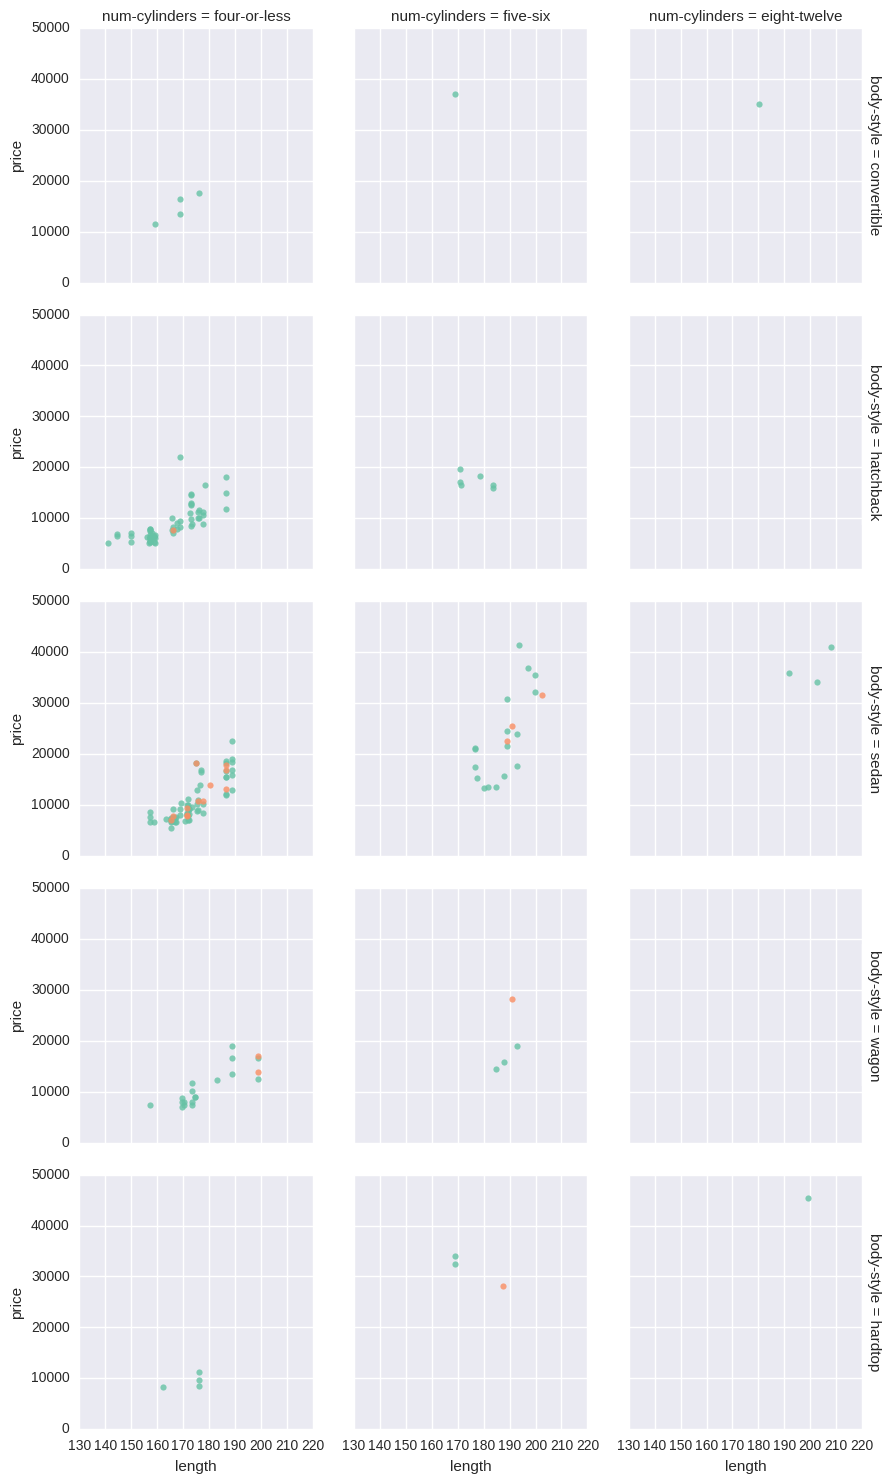

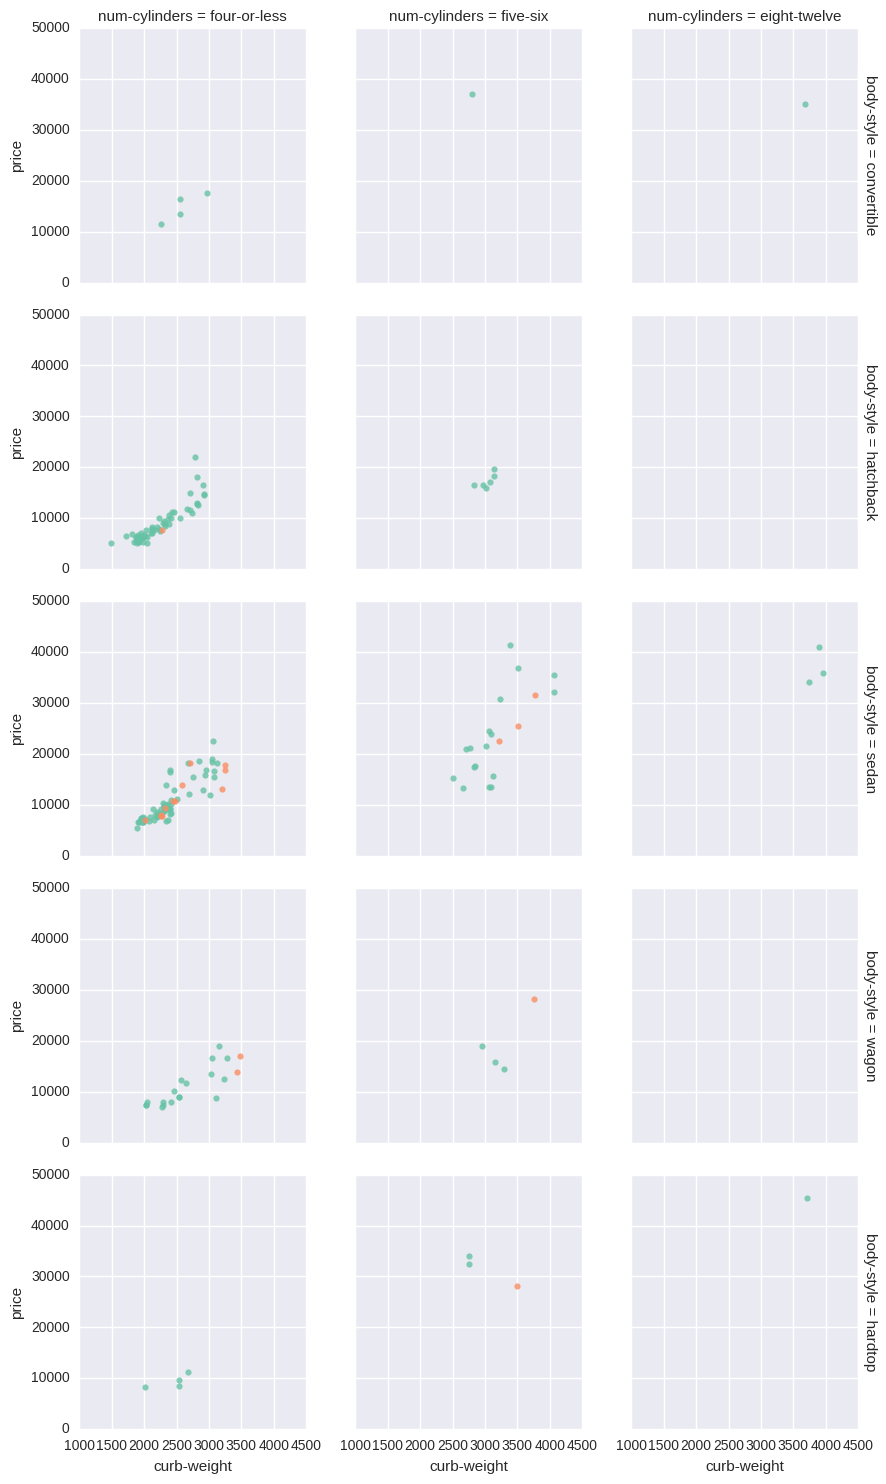

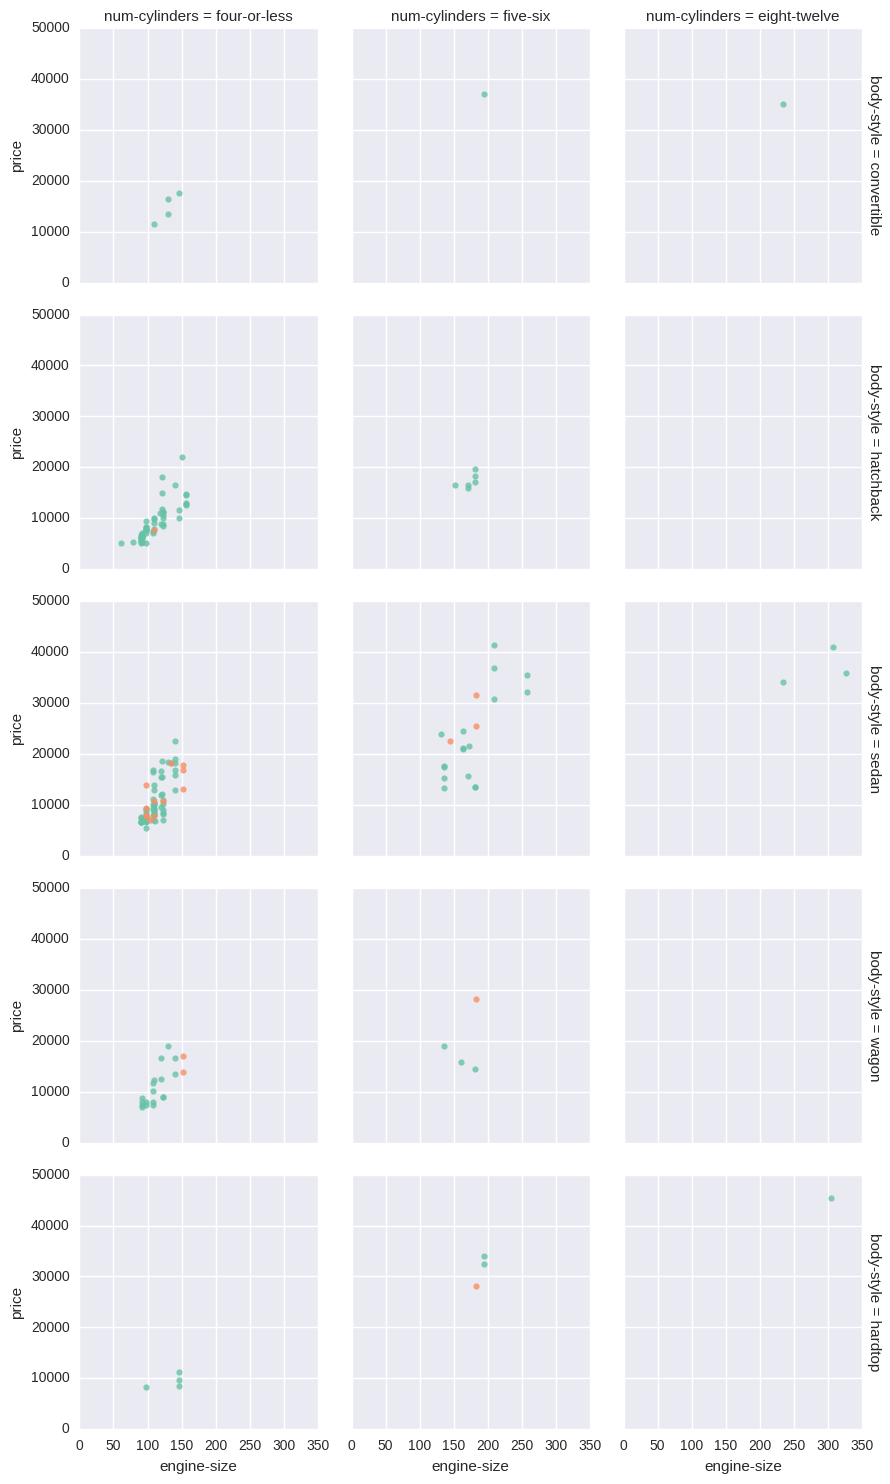

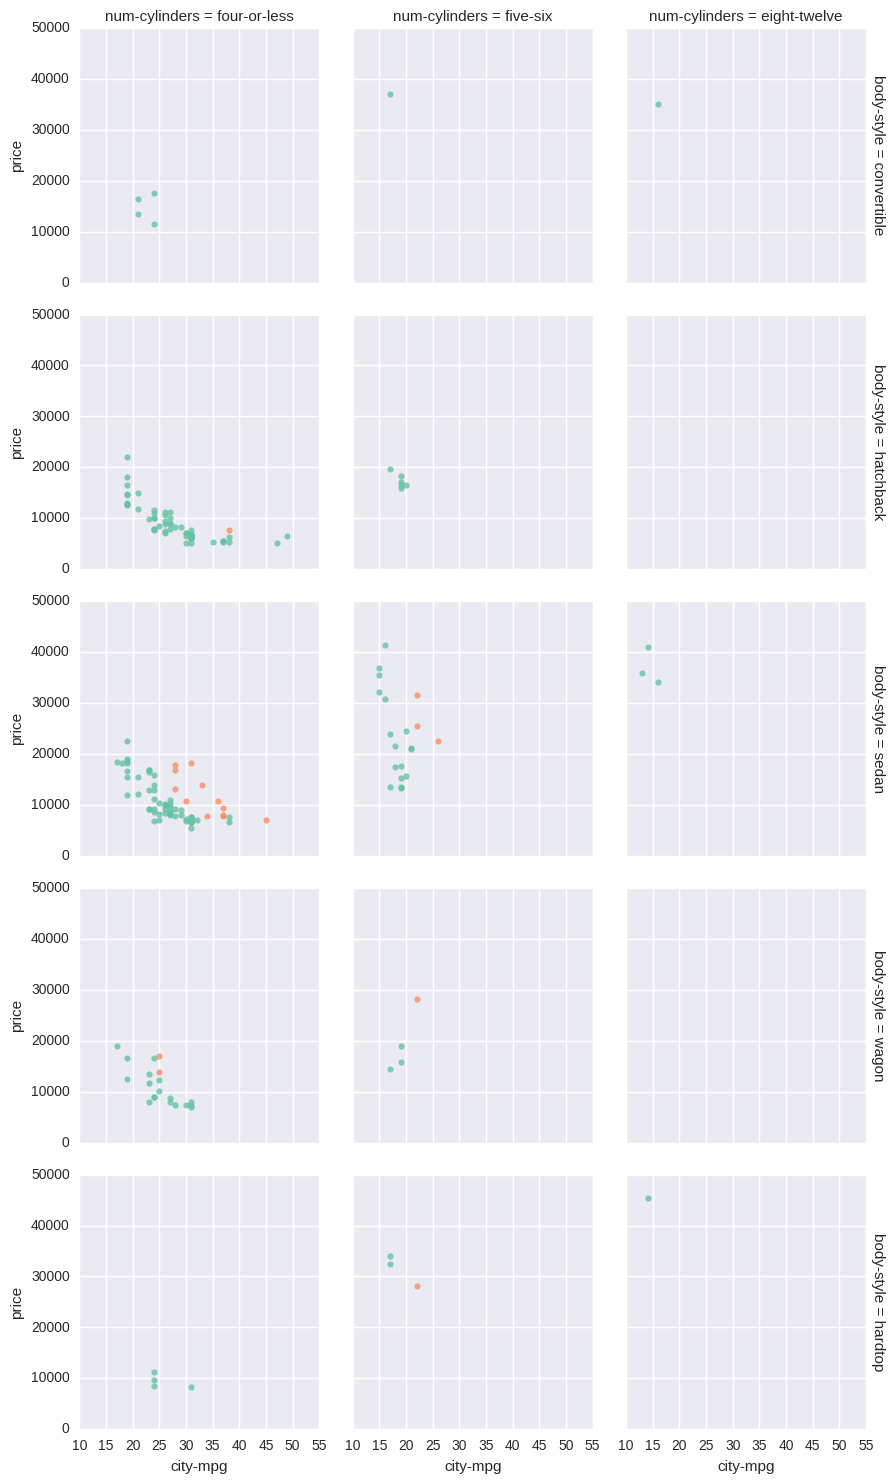

In [6]:
def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(auto_price, col="num-cylinders", row = 'body-style', 
                      hue="fuel-type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)
#        g.map(sns.regplot, "engine-size", "price", fit_reg = False)
cond_plot(plot_cols3)    

In [7]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['Adult Census Income Binary Classification dataset']
Income = ds.to_dataframe()

Income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

'Done'

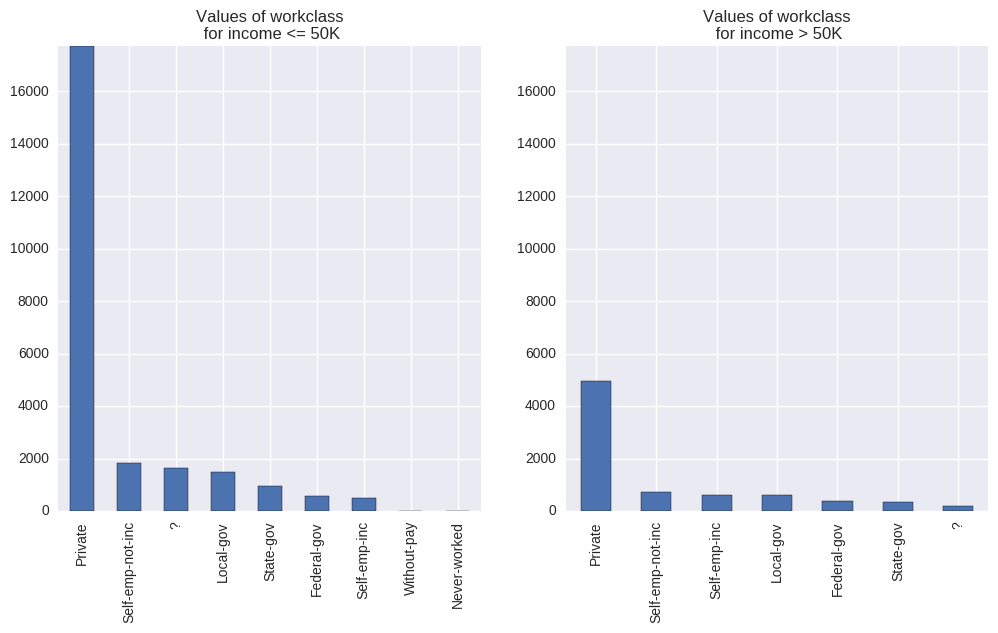

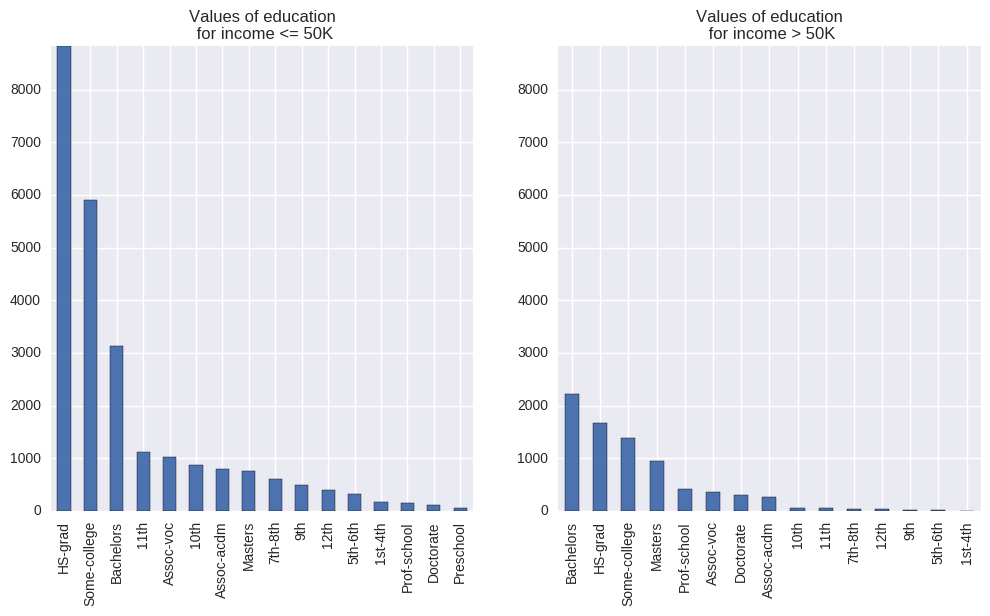

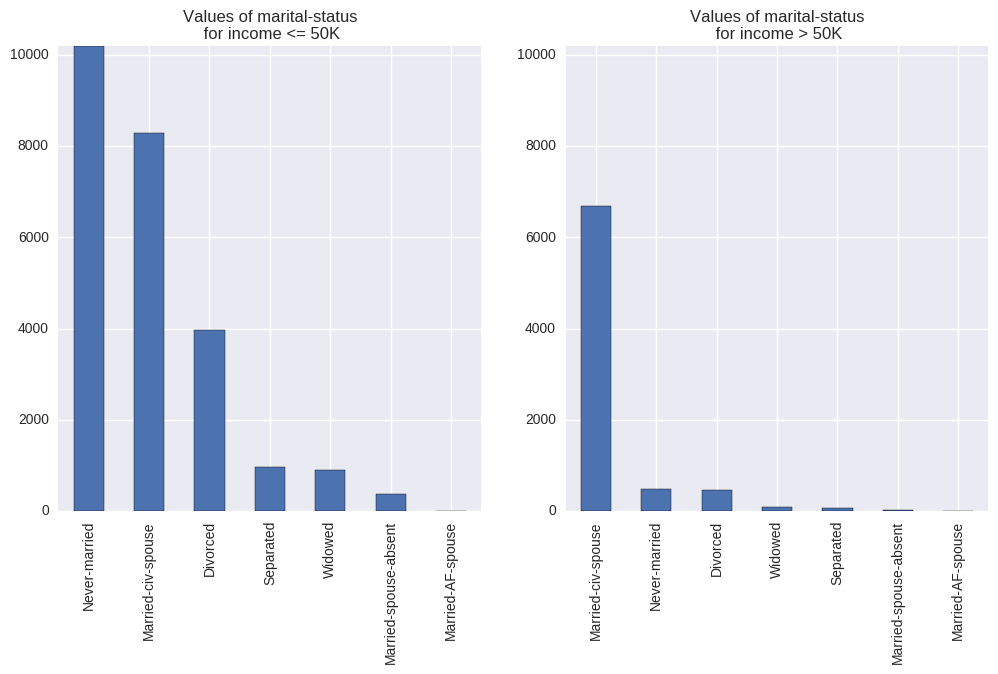

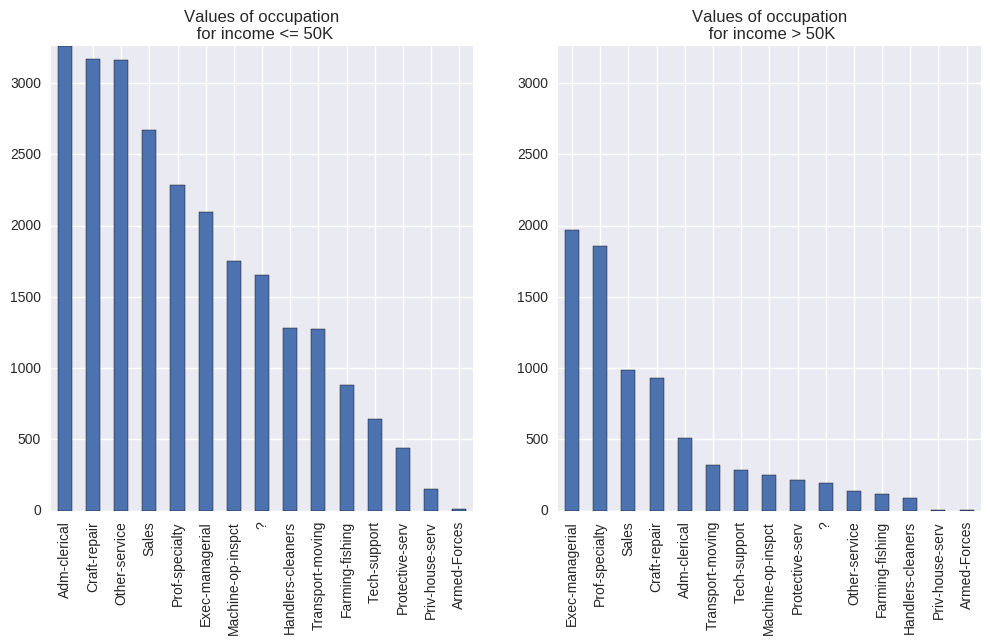

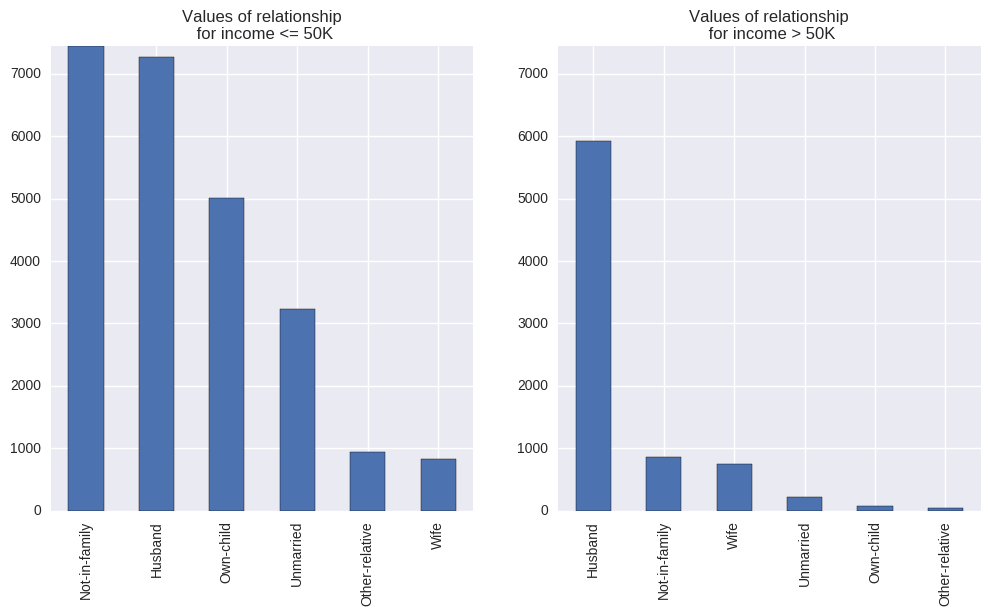

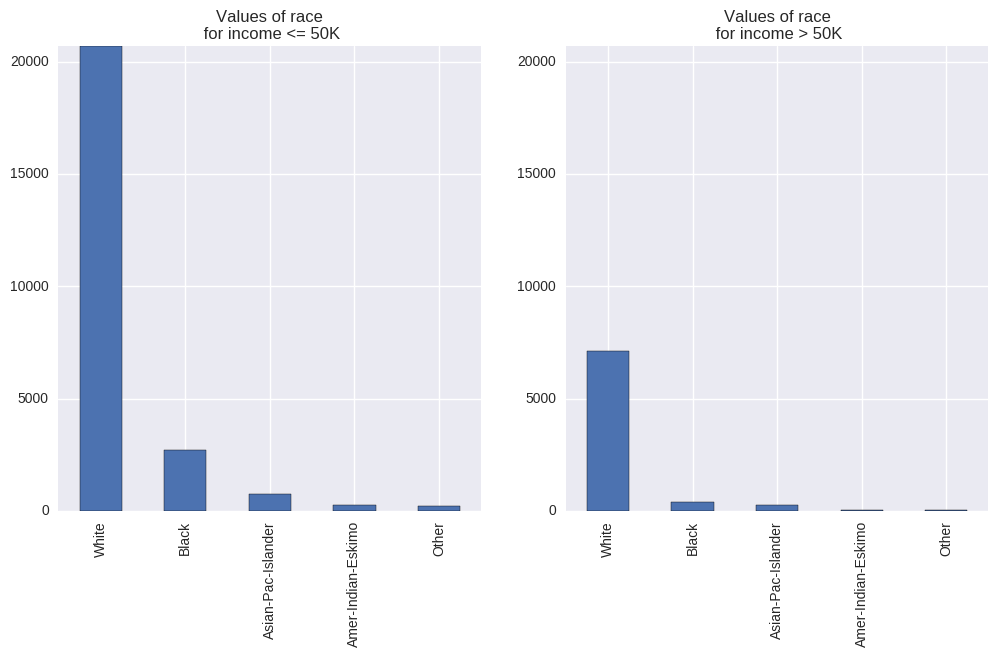

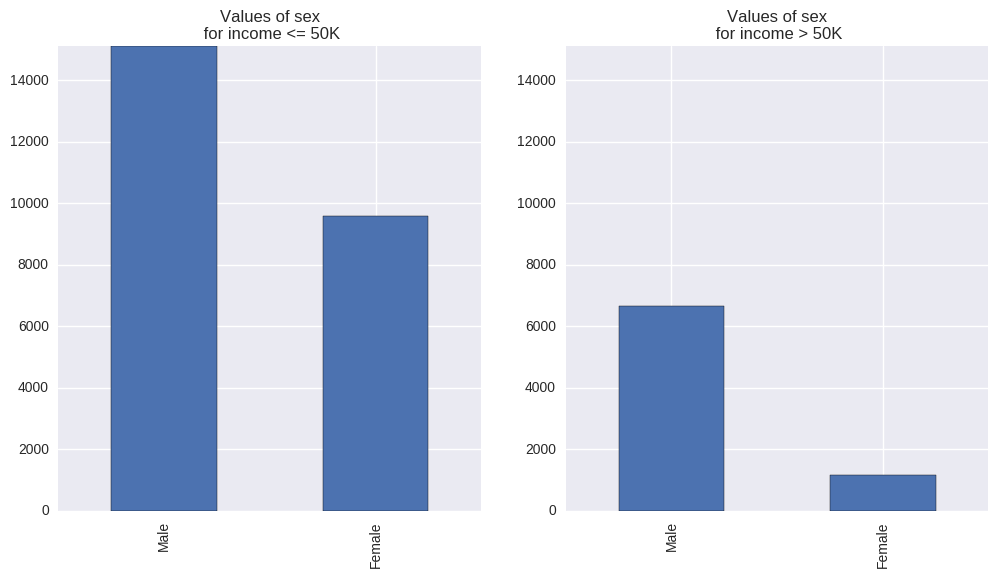

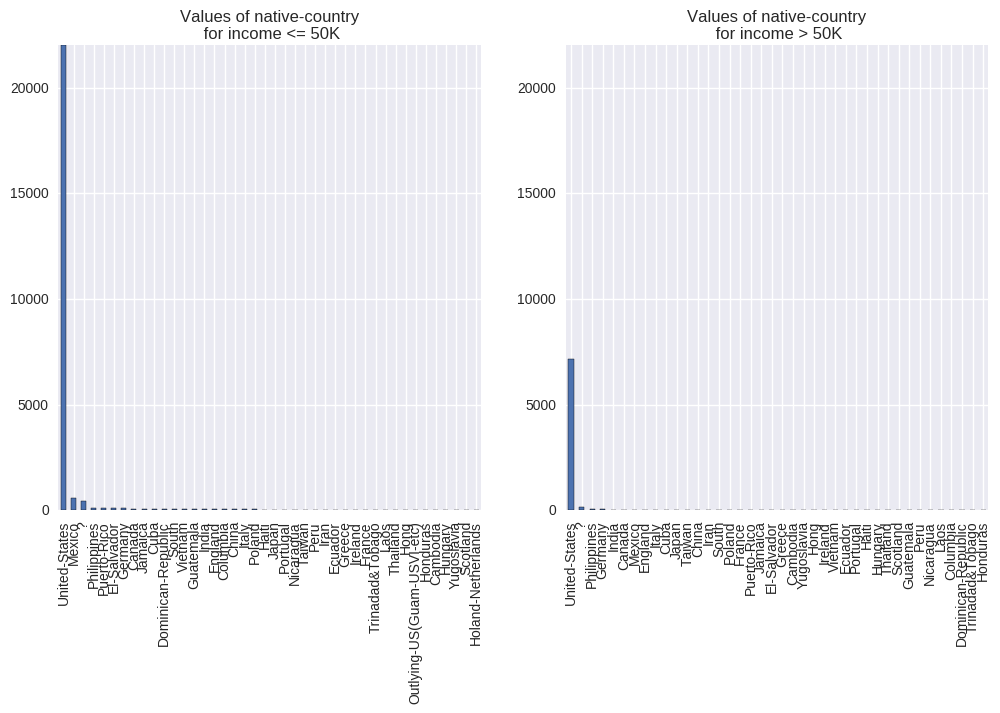

In [8]:
## Plot categorical variables as bar plots
def income_barplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df.ix[:, col].dtype not in [np.int64, np.int32, np.float64]):
            temp1 = df.ix[df['income'] == '<=50K', col].value_counts()
            temp0 = df.ix[df['income'] == '>50K', col].value_counts() 
            
            ylim = [0, max(max(temp1), max(temp0))]
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            temp1.plot(kind = 'bar', ax = ax1, ylim = ylim)
            ax1.set_title('Values of ' + col + '\n for income <= 50K')
            temp0.plot(kind = 'bar', ax = ax0, ylim = ylim)
            ax0.set_title('Values of ' + col + '\n for income > 50K')
    return('Done')        

income_barplot(Income)

'Done'

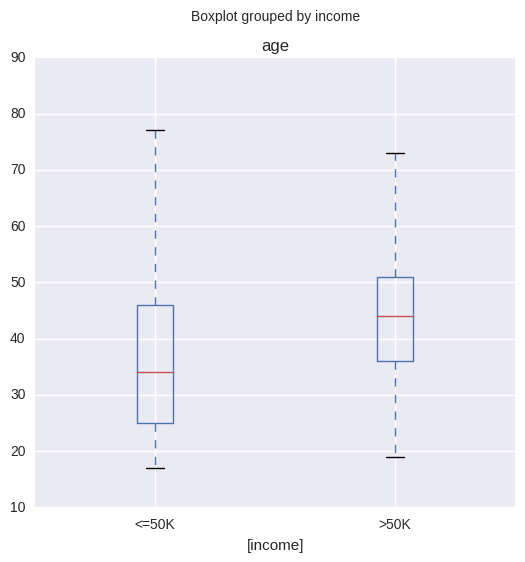

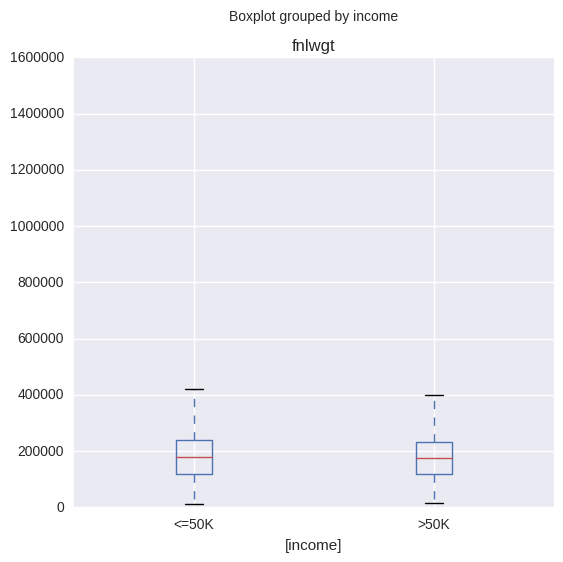

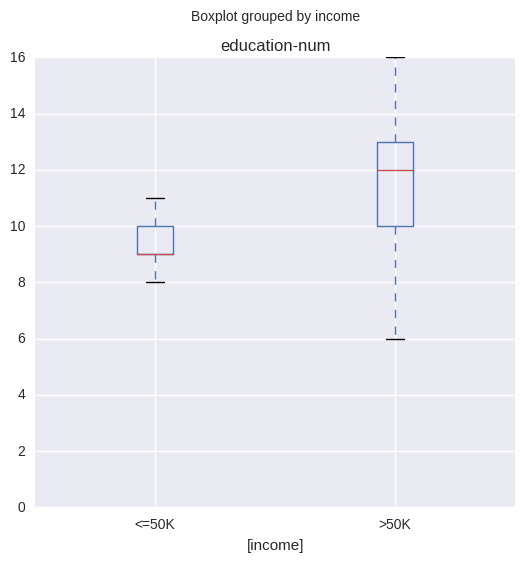

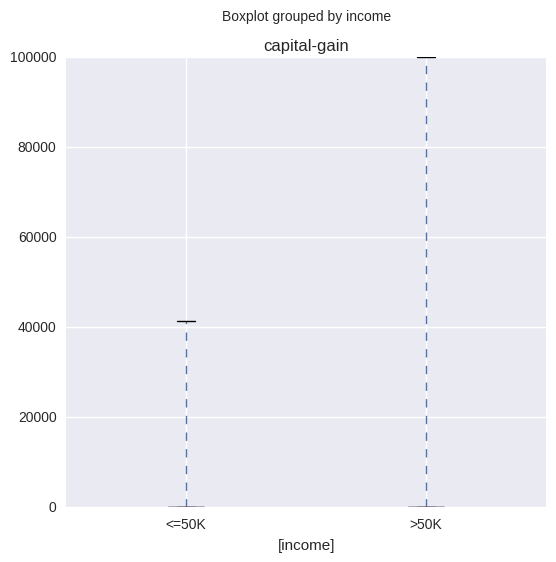

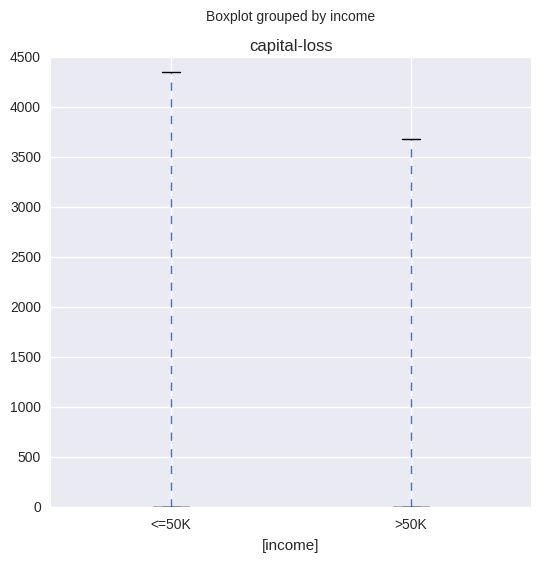

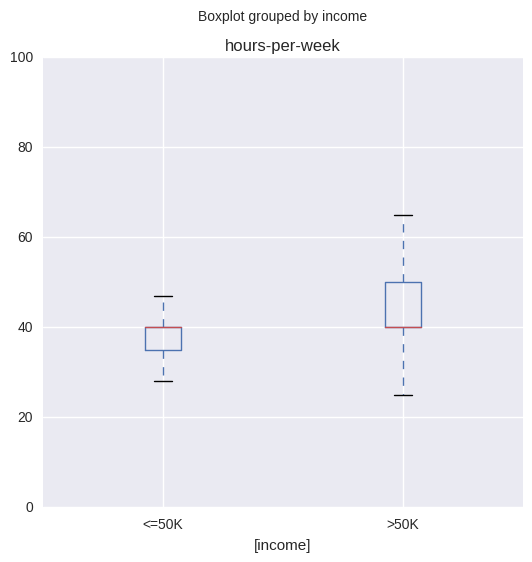

In [9]:
## Plot categorical variables as box plots
def income_boxplot(df):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = ['income'])          
    return('Done') 

income_boxplot(Income)